## 전처리

In [1]:
!wget -c https://github.com/euphoris/datasets/raw/master/neurips.zip

--2021-04-25 10:47:59--  https://github.com/euphoris/datasets/raw/master/neurips.zip
Resolving github.com (github.com)... 15.164.81.167
Connecting to github.com (github.com)|15.164.81.167|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/euphoris/datasets/master/neurips.zip [following]
--2021-04-25 10:47:59--  https://raw.githubusercontent.com/euphoris/datasets/master/neurips.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.110.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 416 Range Not Satisfiable

    The file is already fully retrieved; nothing to do.



In [2]:
import pandas as pd
df = pd.read_csv('../data/neurips.zip') # 압축파일 내의 csv를 불러옴

In [3]:
df.head() # abstract: 요약문

,year,title,abstract
0,2007,Competition Adds Complexity,It is known that determinining whether a DEC-P...
1,2007,Efficient Principled Learning of Thin Junction...,We present the first truly polynomial algorith...
2,2007,Regularized Boost for Semi-Supervised Learning,Semi-supervised inductive learning concerns ho...
3,2007,Simplified Rules and Theoretical Analysis for ...,We show that under suitable assumptions (prima...
4,2007,Predicting human gaze using low-level saliency...,"Under natural viewing conditions, human observ..."


In [4]:
df.tail()

,year,title,abstract
3915,2017,"On Separability of Loss Functions, and Revisit...",We revisit the classical analysis of generativ...
3916,2017,Maxing and Ranking with Few Assumptions,PAC maximum ...
3917,2017,On clustering network-valued data,"Community detection, which focuses on clusteri..."
3918,2017,A General Framework for Robust Interactive Lea...,We propose a general framework for interactive...
3919,2017,Multi-view Matrix Factorization for Linear Dyn...,We consider maximum likelihood estimation of l...


- 주제분석의 결과를 보고 어느 것을 사용할 지 판단
- CountVectorizer 자주나오는 단어의 비중을 많이 반영
- TfidfVectorizer 여러문서에 공통적으로 많이 나온 단어는 덜 반영

In [5]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
cv = TfidfVectorizer(stop_words='english', max_features=2000)

In [6]:
x = cv.fit_transform(df.abstract)

In [7]:
words = cv.get_feature_names()

## SVD

In [8]:
from sklearn.decomposition import TruncatedSVD # 분해 후, 불필요한 부분을 제거

In [9]:
x.shape # 문서:3920, 단어의 갯수:2000 // 각각의 문서가 2000개의 단어로 표현, 2000차원

(3920, 2000)

In [10]:
svd = TruncatedSVD(n_components=100, random_state=1234) # 100차원으로 축소

- fit은 분석을 하는 과정
- transform은 분석결과를 바탕으로 변환을 해서 새로운 무언가를 만드는 것

In [11]:
svd.fit(x) # x를 (문서들을 100차원으로 표현, 100차원이 2000차원과 어떠한 관련이 있는지)로 분해

TruncatedSVD(n_components=100, random_state=1234)

In [12]:
svd.components_.shape # 차원이 100개, 각각의 차원별로 2000개의 단어들과 어떠한 관련이 있는지를 값으로 보여줌

(100, 2000)

In [13]:
svd.components_

array([[ 0.00483864,  0.01243762,  0.004755  , ...,  0.00491457,
         0.0162017 ,  0.01160996],
       [-0.0055402 , -0.01859974, -0.00681511, ...,  0.00074343,
         0.0014955 ,  0.00839796],
       [-0.00331551, -0.02285996, -0.00537686, ..., -0.00103497,
         0.00135762, -0.00786135],
       ...,
       [-0.00037104,  0.02843677,  0.00591093, ...,  0.0027189 ,
         0.01184353, -0.01022713],
       [ 0.00286079, -0.02232737, -0.00742612, ...,  0.00374566,
        -0.00553911, -0.00644252],
       [ 0.00840489,  0.00073834,  0.00954845, ..., -0.00397496,
        -0.00763423, -0.00401217]])

In [14]:
word_idx = words.index('topic'); word_idx

1861

In [15]:
svd.components_[:,word_idx]

array([ 2.21636837e-02, -3.35006049e-02,  6.34481186e-02, -9.08255574e-03,
       -2.59052356e-02, -3.04093871e-02,  4.31240860e-02, -4.44698174e-02,
       -5.35017435e-02,  2.51650395e-02, -7.43829615e-02, -4.09887607e-02,
        1.43222364e-03,  9.13531186e-02, -5.15778667e-02,  1.43561806e-02,
        1.43079857e-02,  1.08711712e-01, -1.99153193e-02,  9.44076667e-02,
       -1.49543745e-01,  7.67068611e-02, -9.41560593e-02,  1.36303047e-02,
       -4.61174101e-02,  1.04014531e-01,  1.14117206e-01,  1.99617317e-01,
        3.19722162e-02,  6.47920314e-02, -9.24920865e-02,  2.24452596e-02,
        1.25802356e-02,  1.57600255e-02,  3.03693389e-02, -1.57972126e-01,
       -6.85859397e-02, -2.71583590e-02, -4.23475068e-02,  6.59471303e-03,
       -7.82198356e-02,  6.56273694e-02,  1.66759836e-02,  5.84677258e-02,
        1.36793675e-02, -4.11903979e-02,  2.94849115e-02, -2.23744287e-02,
       -7.98992089e-02,  7.03076161e-02, -8.41267895e-02, -9.61470800e-02,
       -6.79298440e-02, -

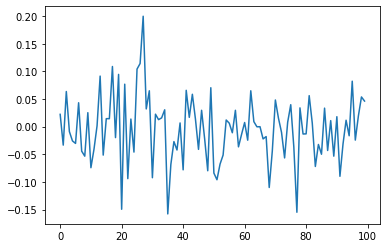

In [16]:
from matplotlib import pyplot
pyplot.plot(svd.components_[:, word_idx])  # 100개의 주제별 관련도, 제일 높은 지점이 topic이라는 단어와 가장 관련도가 강한 주제

In [17]:
topic_idx = svd.components_[:, word_idx].argmax() # 가장 큰 값이 있는 위치
topic_idx

27

In [18]:
topic = pd.DataFrame({'word': words, 'loading': svd.components_[topic_idx]}) # 주제와 단어의 관련도를 보통 loading이라고 표현
topic.sort_values('loading').tail() # loading 값이 큰 부분부터 보기 위해

,word,loading
1202,norm,0.119621
804,graph,0.126101
866,image,0.155490
1861,topic,0.199617
1713,sparse,0.211411


- 이 주제가 증가하면, topic,sparse,image,graph,norm이 동시에 증가
- 문서의 단어빈도는 주제의 값 하나만 가지고 결정되는 것이 아니라, 주제가 100개라면 100개의 주제별로 다 곱해서 곱한결과를 더해서 최종적으로 단어 빈도가 된다. 각각의 주제가 이렇게 나온다면 해석하기가 쉽지 않고, 회전이라는 것을 이용할 것

## 병렬 분석

- 어느정도 차원이 적절한지를 판별

In [19]:
import numpy as np

In [20]:
nrow, ncol = x.shape

In [21]:
def resample(a):
    return np.random.choice(a, size=nrow) # a에서 무작위로, nrow만큼 선택

np.random.seed(2999)
d = np.apply_along_axis(resample, 0, x.A) # 단어들 간의 관계를 망가뜨린다.
# 0번은 행방향이므로, x를 열마다 x를 뽑아 새로운 x를 만듦.
# d와 x는 단어빈도의 분포는 비슷, x에 있던 단어와 단어의 관계가 헝클어진다.

In [22]:
d.shape

(3920, 2000)

In [23]:
svd2 = TruncatedSVD(n_components=100, random_state=1234)
svd2.fit(d)

TruncatedSVD(n_components=100, random_state=1234)

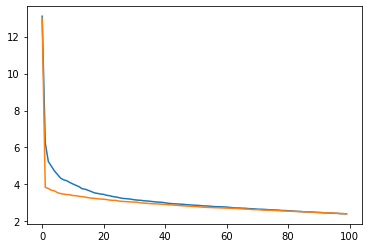

In [24]:
pyplot.plot(svd.singular_values_) # 100개의 차원 중 각각의 차원이 가지는 중요성
pyplot.plot(svd2.singular_values_)

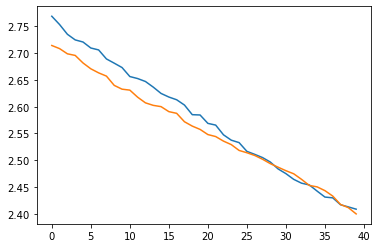

In [25]:
pyplot.plot(svd.singular_values_[60:])
pyplot.plot(svd2.singular_values_[60:])
# 그정도의 설명력은 망가진 데이터에서도 나오기 때문에 설명력이 없다.

In [26]:
svd.singular_values_-svd2.singular_values_

array([ 1.02184545e-01,  2.40815353e+00,  1.46387541e+00,  1.29801274e+00,
        1.07919708e+00,  9.80976249e-01,  8.34164117e-01,  7.77079421e-01,
        7.45502972e-01,  6.64272745e-01,  6.25054724e-01,  5.62741331e-01,
        5.20163849e-01,  4.30513997e-01,  4.22431409e-01,  3.97282251e-01,
        3.55380212e-01,  2.96571356e-01,  2.89000222e-01,  2.72139574e-01,
        2.62931477e-01,  2.32747525e-01,  2.35963171e-01,  2.04960492e-01,
        1.86785976e-01,  1.84937104e-01,  1.66204666e-01,  1.61107994e-01,
        1.58736704e-01,  1.46655793e-01,  1.23402946e-01,  1.13850994e-01,
        1.40411430e-01,  1.26731148e-01,  1.26590041e-01,  1.26138602e-01,
        1.17895756e-01,  1.03059338e-01,  1.01597124e-01,  1.03583136e-01,
        8.96307540e-02,  7.69945466e-02,  7.03008451e-02,  7.59410016e-02,
        7.59317748e-02,  7.66670457e-02,  8.36953707e-02,  7.33101380e-02,
        7.51780990e-02,  7.30947991e-02,  6.73614827e-02,  7.98969124e-02,
        6.87201744e-02,  

In [27]:
np.argwhere(svd.singular_values_ - svd2.singular_values_ <= 0)[0] # 따라잡히는 부분

array([89], dtype=int64)

- 다시 돌릴 필요 없이 89번 이후로 무시해도 된다.

In [28]:
svd.singular_values_

array([13.1049632 ,  6.24887246,  5.23960279,  4.98203029,  4.7245208 ,
        4.53275958,  4.33575812,  4.24397353,  4.1973569 ,  4.09940561,
        4.02136252,  3.94607169,  3.8746375 ,  3.76425946,  3.73489504,
        3.67494864,  3.61006926,  3.53957768,  3.51066328,  3.47703452,
        3.45776757,  3.40751104,  3.38371683,  3.33792005,  3.31826573,
        3.28017049,  3.24411588,  3.22981461,  3.21560609,  3.19422682,
        3.16531139,  3.14646559,  3.13715368,  3.11301141,  3.10200024,
        3.0856626 ,  3.06587763,  3.04871832,  3.03661395,  3.02810667,
        3.00140631,  2.97553745,  2.95843558,  2.9476044 ,  2.93915616,
        2.92645519,  2.91931826,  2.89893826,  2.89110166,  2.87695688,
        2.8657671 ,  2.85870811,  2.83952174,  2.83321537,  2.82688514,
        2.81075124,  2.79682435,  2.78961972,  2.78629947,  2.78009958,
        2.76914862,  2.75360076,  2.73542092,  2.72491842,  2.72097482,
        2.70977702,  2.70618782,  2.68935835,  2.68141988,  2.67

In [29]:
svd.components_.shape

(100, 2000)

## 회전

In [30]:
# !pip install factor_analyzer

  Created wheel for factor-analyzer: filename=factor_analyzer-0.3.2-py3-none-any.whl size=40380 sha256=8f1bf9f9eaa8600b03de21bf1675aeb12332cce7a7fa7a03cf36ef9a69176493
  Stored in directory: c:\users\msi\appdata\local\pip\cache\wheels\b1\d4\b5\9da0e0e81266e87f5e85068f031077c8a2ae0eedf76ea1d294
Successfully built factor-analyzer


In [31]:
from factor_analyzer.rotator import Rotator

In [32]:
rotator = Rotator() # 초기화

- 행방향: 주제, 열방향:단어 -> T로 행과 열을 뒤집음 
- 행방향: 단어, 열방향: 주제로 변경

In [33]:
rot = rotator.fit_transform(svd.components_.T) 

In [34]:
loading = rot.T

- 회전을 하게되면, 모든 관련도를 특정 주제로 몰아준다.

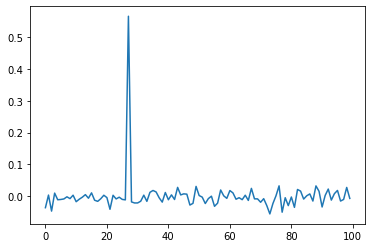

In [35]:
pyplot.plot(loading[:, word_idx])

In [36]:
topic_idx = loading[:, word_idx].argmax()
topic_idx

27

In [38]:
topic = pd.DataFrame({'word': words, 'loading': loading[topic_idx]})
topic.sort_values('loading').tail(10)

,word,loading
1842,text,0.121777
999,latent,0.157819
520,dirichlet,0.187826
540,document,0.192213
1987,word,0.208114
1988,words,0.215588
1003,lda,0.224917
541,documents,0.225140
1862,topics,0.273106
1861,topic,0.566290


In [39]:
doc_topics = svd.transform(x)

In [40]:
doc_topics.shape

(3920, 100)

- 회전 적용(@는 행렬의 곱을 뜻함)

In [41]:
doc_topics = doc_topics @ rotator.rotation_

In [43]:
doc_topics[:,topic_idx] # 문서별로 27번 주제를 얼마나 포함하고 있는지

array([ 0.04513653, -0.02398903,  0.02458688, ...,  0.01771896,
       -0.01505735,  0.03134085])

In [44]:
year_topic = pd.DataFrame({'year': df.year, 'topic': doc_topics[:, topic_idx]}); year_topic

,year,topic
0,2007,0.045137
1,2007,-0.023989
2,2007,0.024587
3,2007,0.008981
4,2007,0.006652
...,...,...
3915,2017,-0.020803
3916,2017,0.030219
3917,2017,0.017719
3918,2017,-0.015057


- 주제분석 연구가 2007년에는 활발했으나, 점차 감소하고 있다.

In [45]:
year_topic.groupby('year').agg('mean') # 연도별 평균

,topic
year,
2007,0.025189
2008,0.016155
2009,0.019187
2010,0.013317
2011,0.010558
2012,0.016707
2013,0.015346
2014,0.014001
2015,0.009028


In [46]:
word_idx1 = words.index('deep')

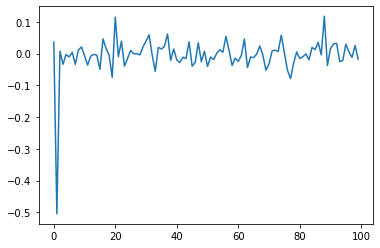

In [47]:
pyplot.plot(loading[:, word_idx1])

In [48]:
topic_idx1 = loading[:, word_idx1].argmax()
topic_idx1

88

In [51]:
topic_idx1 = loading[:, word_idx1].argmin()
topic_idx1

1

- 1번주제가 감소하면 deep,layer,convolution등의 단어가 감소한다.

In [52]:
topic = pd.DataFrame({'word': words, 'loading': loading[topic_idx1]})
topic.sort_values('loading').head(10)

,word,loading
450,deep,-0.505157
1001,layer,-0.283529
1002,layers,-0.217273
1184,networks,-0.215860
397,convolutional,-0.190170
1185,neural,-0.165311
1483,recognition,-0.131614
1872,trained,-0.110204
105,architecture,-0.109013
106,architectures,-0.106676


In [53]:
year_topic1 = pd.DataFrame({'year': df.year, 'topic': doc_topics[:, topic_idx1]}); year_topic

,year,topic
0,2007,0.045137
1,2007,-0.023989
2,2007,0.024587
3,2007,0.008981
4,2007,0.006652
...,...,...
3915,2017,-0.020803
3916,2017,0.030219
3917,2017,0.017719
3918,2017,-0.015057


- 마이너스가 심해질 수록 딥러닝이라는 단어가 많이 나옴
- 딥러닝의 주제는 시간이 지날수록 뜨고있다.

In [54]:
year_topic1.groupby('year').agg('mean')

,topic
year,
2007,-0.016888
2008,-0.013269
2009,-0.013078
2010,-0.016361
2011,-0.009583
2012,-0.016532
2013,-0.016087
2014,-0.028141
2015,-0.031285


## NMF

In [55]:
from sklearn.decomposition import NMF
nmf = NMF(n_components=89, random_state=1234)
doc_topics = nmf.fit_transform(x)

C:\Users\msi\anaconda3\lib\site-packages\sklearn\decomposition\_nmf.py:312: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(("The 'init' value, when 'init=None' and "
C:\Users\msi\anaconda3\lib\site-packages\sklearn\decomposition\_nmf.py:1090: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn("Maximum number of iterations %d reached. Increase it to"


In [56]:
loading = nmf.components_

In [57]:
word_idx = words.index('topic') # topic이라는 단어가 몇번인지

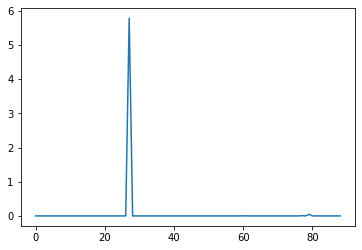

In [58]:
pyplot.plot(loading[:, word_idx]) 
# 어떠한 주제와 관련이 있는지, NMF는 회전을 하지 않아도 나머지는 0, 회전을 한 것 같은 효과

In [59]:
topic_idx = loading[:, word_idx].argmax()
topic_idx

27

In [60]:
topic = pd.DataFrame({'word': words, 'loading': loading[topic_idx]})
topic.sort_values('loading').tail(10)

,word,loading
1138,modeling,0.577834
1842,text,0.816866
64,allocation,0.995832
1988,words,1.225253
540,document,1.435367
520,dirichlet,1.626153
541,documents,1.919543
1003,lda,2.077631
1862,topics,2.810796
1861,topic,5.789769


In [61]:
year_topic = pd.DataFrame({'year': df.year, 'topic': doc_topics[:, topic_idx]})
year_topic.groupby('year').agg('mean')

,topic
year,
2007,0.002231
2008,0.001294
2009,0.001785
2010,0.001217
2011,0.001194
2012,0.001699
2013,0.001276
2014,0.001205
2015,0.000814


In [62]:
word_idx1 = words.index('deep')

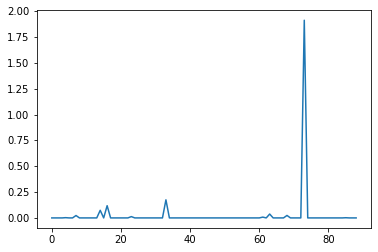

In [63]:
pyplot.plot(loading[:, word_idx1])

In [64]:
topic_idx1 = loading[:, word_idx1].argmax(); topic_idx1

73

In [65]:
topic1 = pd.DataFrame({'word': words, 'loading': loading[topic_idx1]})
topic1.sort_values('loading').tail(10)

,word,loading
1872,trained,0.230900
1483,recognition,0.250119
834,hidden,0.260007
1541,representations,0.265281
397,convolutional,0.274323
106,architectures,0.329308
105,architecture,0.336127
1002,layers,0.707754
1001,layer,0.866000
450,deep,1.911767


In [66]:
year_topic1 = pd.DataFrame({'year': df.year, 'topic': doc_topics[:, topic_idx1]})
year_topic1.groupby('year').agg('mean')

,topic
year,
2007,0.004420
2008,0.001310
2009,0.002862
2010,0.003458
2011,0.002289
2012,0.003851
2013,0.003451
2014,0.006174
2015,0.007276
